In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Specific sklearn ones
from sklearn.ensemble import  RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
#Importing training data (Discovery set)
file_features_training = 'RadiomicsFeatures_training.csv'
features_training      = pd.read_csv(file_features_training)

file_response_training = 'Response_training.csv'
responses_training     = pd.read_csv(file_response_training)
responses_training     = np.ravel(responses_training, order='C')

In [3]:
#Importing testing data (External set)
file_features_testing  = 'RadiomicsFeatures_testing.csv'
file_response_testing  = 'Response_testing.csv'
features_testing       = pd.read_csv(file_features_testing)
responses_testing      = pd.read_csv(file_response_testing)
responses_testing      = np.ravel(responses_testing, order='C')

Let us begin by choosing a ML model. In our case, it is the Random Forest Classifier model

In [4]:
rfc = RandomForestClassifier()
#Fitting training data on rfc
rfc.fit(features_training, responses_training)

#Score of model without any hyperparameter tuning
rfc.score(features_testing, responses_testing)

0.6382978723404256

We can see that this accuracy level could be improved so we can perform hyperparameter tuning to do so

In [5]:
#identifying parameters we can tune
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
#set of the parameters with different values we will use for the grid search
tuned_parameters = {
    "n_estimators" : [5, 10, 20, 30, 40],
    "max_depth" : [1, 2, 3, 4, 5]
}

print('Other model parameters such as "min_samples_split", "min_samples_leaf", and "max_leaf_nodes" were also considered and put into the tuned parameters set. However, running time becomae an issue and these two prameters were considered to be the most important ones to tune. Moreover, more values of the parameters were also chosen initially, but again, running time became an issue.')

Other model parameters such as "min_samples_split", "min_samples_leaf", and "max_leaf_nodes" were also considered and put into the tuned parameters set. However, running time becomae an issue and these two prameters were considered to be the most important ones to tune. Moreover, more values of the parameters were also chosen initially, but again, running time became an issue.


In [7]:
#grid search identifying every possible combination of the different values of hyper parameters
rfc_models = GridSearchCV(
    rfc, scoring="accuracy", param_grid=tuned_parameters, cv=5, return_train_score=True, verbose=10
)

np.random.seed(20) #to not get different results everytime we run the code

#fitting the grid search to the training data
rfc_models.fit(features_training, responses_training)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START max_depth=1, n_estimators=5................................
[CV 1/5; 1/25] END max_depth=1, n_estimators=5;, score=(train=0.708, test=0.692) total time=   0.0s
[CV 2/5; 1/25] START max_depth=1, n_estimators=5................................
[CV 2/5; 1/25] END max_depth=1, n_estimators=5;, score=(train=0.735, test=0.667) total time=   0.0s
[CV 3/5; 1/25] START max_depth=1, n_estimators=5................................
[CV 3/5; 1/25] END max_depth=1, n_estimators=5;, score=(train=0.714, test=0.667) total time=   0.0s
[CV 4/5; 1/25] START max_depth=1, n_estimators=5................................
[CV 4/5; 1/25] END max_depth=1, n_estimators=5;, score=(train=0.735, test=0.500) total time=   0.0s
[CV 5/5; 1/25] START max_depth=1, n_estimators=5................................
[CV 5/5; 1/25] END max_depth=1, n_estimators=5;, score=(train=0.714, test=0.917) total time=   0.0s
[CV 1/5; 2/25] START max_depth=1,

[CV 1/5; 10/25] END max_depth=2, n_estimators=40;, score=(train=0.792, test=0.846) total time=   0.0s
[CV 2/5; 10/25] START max_depth=2, n_estimators=40..............................
[CV 2/5; 10/25] END max_depth=2, n_estimators=40;, score=(train=0.878, test=0.667) total time=   0.0s
[CV 3/5; 10/25] START max_depth=2, n_estimators=40..............................
[CV 3/5; 10/25] END max_depth=2, n_estimators=40;, score=(train=0.878, test=0.583) total time=   0.0s
[CV 4/5; 10/25] START max_depth=2, n_estimators=40..............................
[CV 4/5; 10/25] END max_depth=2, n_estimators=40;, score=(train=0.816, test=0.500) total time=   0.0s
[CV 5/5; 10/25] START max_depth=2, n_estimators=40..............................
[CV 5/5; 10/25] END max_depth=2, n_estimators=40;, score=(train=0.857, test=0.833) total time=   0.0s
[CV 1/5; 11/25] START max_depth=3, n_estimators=5...............................
[CV 1/5; 11/25] END max_depth=3, n_estimators=5;, score=(train=0.854, test=0.846) tot

[CV 2/5; 19/25] END max_depth=4, n_estimators=30;, score=(train=0.980, test=0.667) total time=   0.0s
[CV 3/5; 19/25] START max_depth=4, n_estimators=30..............................
[CV 3/5; 19/25] END max_depth=4, n_estimators=30;, score=(train=0.959, test=0.583) total time=   0.0s
[CV 4/5; 19/25] START max_depth=4, n_estimators=30..............................
[CV 4/5; 19/25] END max_depth=4, n_estimators=30;, score=(train=0.980, test=0.583) total time=   0.0s
[CV 5/5; 19/25] START max_depth=4, n_estimators=30..............................
[CV 5/5; 19/25] END max_depth=4, n_estimators=30;, score=(train=1.000, test=0.667) total time=   0.0s
[CV 1/5; 20/25] START max_depth=4, n_estimators=40..............................
[CV 1/5; 20/25] END max_depth=4, n_estimators=40;, score=(train=0.958, test=0.923) total time=   0.0s
[CV 2/5; 20/25] START max_depth=4, n_estimators=40..............................
[CV 2/5; 20/25] END max_depth=4, n_estimators=40;, score=(train=0.980, test=0.667) to

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [5, 10, 20, 30, 40]},
             return_train_score=True, scoring='accuracy', verbose=10)

In [8]:
#Setting the dataout in a more clear pandas dataframe
rfc_cv_results = pd.DataFrame(rfc_models.cv_results_)
rfc_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012828,0.002287,0.002916,0.000488,1,5,"{'max_depth': 1, 'n_estimators': 5}",0.692308,0.666667,0.666667,...,0.688462,0.133087,9,0.708333,0.734694,0.714286,0.734694,0.714286,0.721259,0.011183
1,0.019558,0.001445,0.002770,0.000483,1,10,"{'max_depth': 1, 'n_estimators': 10}",0.692308,0.583333,0.583333,...,0.588462,0.061137,25,0.750000,0.734694,0.836735,0.795918,0.795918,0.782653,0.036450
2,0.035586,0.001180,0.004756,0.000773,1,20,"{'max_depth': 1, 'n_estimators': 20}",0.769231,0.666667,0.666667,...,0.670513,0.095045,16,0.791667,0.795918,0.795918,0.795918,0.734694,0.782823,0.024121
3,0.051775,0.003533,0.004632,0.000478,1,30,"{'max_depth': 1, 'n_estimators': 30}",0.692308,0.666667,0.833333,...,0.688462,0.110256,9,0.770833,0.836735,0.775510,0.795918,0.816327,0.799065,0.024814
4,0.074757,0.008435,0.005558,0.000393,1,40,"{'max_depth': 1, 'n_estimators': 40}",0.692308,0.666667,0.666667,...,0.638462,0.114999,23,0.770833,0.877551,0.775510,0.775510,0.775510,0.794983,0.041324


In [9]:
#Finding the model with the best combo of hyperparameters
rfc_models.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=10)

In [10]:
#Finding the highest level of accuracy of all the models
rfc_models.best_score_

0.7692307692307693

This graph measures the fit of the training data, so naturally is going to be high scores. It allows us to see regions of the hypermarameter values where the best fit is.

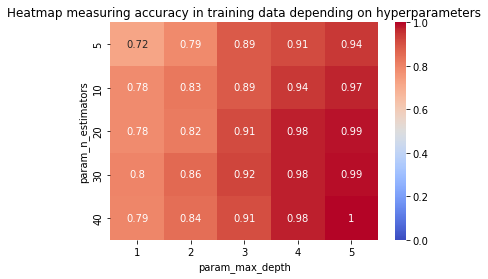

In [11]:
pivot_rfc_train = rfc_cv_results.pivot('param_n_estimators','param_max_depth','mean_train_score')
sns.heatmap(data=pivot_rfc_train, annot=True, vmin=0, vmax=1, cmap='coolwarm')
plt.title("Heatmap measuring accuracy in training data depending on hyperparameters")
plt.show()

This graph shows the performance for different hyper parameters for the external cohort

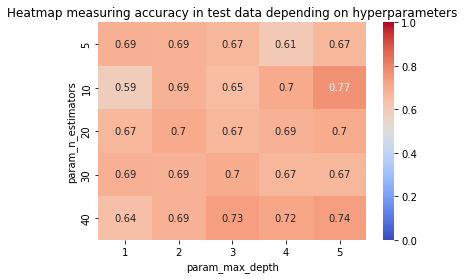

In [12]:
pivot_rfc_test = rfc_cv_results.pivot('param_n_estimators','param_max_depth','mean_test_score')
sns.heatmap(data=pivot_rfc_test, annot=True, vmin=0, vmax=1, cmap='coolwarm')
plt.title("Heatmap measuring accuracy in test data depending on hyperparameters")
plt.show()

We are unable to test the external set with the GridSearchCV function, so we need to manually create the function so that we can compare the results when training on the discovery set and testing on the external test set

In [13]:
# Hyperparameter combinations
max_depth_values = [1, 2, 3, 4, 5]
n_estimators_values = [5, 10, 20, 30, 40]

rfc_models = [] #list to store the models and make df

for max_depth in max_depth_values: #for each value of max_depth
    for n_estimators in n_estimators_values: #produce each value of no. estimators
        rfc_model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=20)
        
        rfc_model.fit(features_training, responses_training)
        
        rfc_score_train = rfc_model.score(features_training, responses_training)
        rfc_score = rfc_model.score(features_testing, responses_testing) # score on testing data

        test_pred = rfc_model.predict(features_testing)
        auc = roc_auc_score(responses_testing, test_pred)
        
        # Append the model to the list
        rfc_models.append((f"rfc_{max_depth}_{n_estimators}", rfc_model, max_depth, n_estimators, rfc_score, rfc_score_train, auc))

In [14]:
rfc_models_df = pd.DataFrame(rfc_models)
rfc_models_df.columns = ['Model Number', 'Model Hyperparams', 'Max Depth', 'No. estimators', 'Test accuracy', 'Training accuracy', 'Test AUC']

rfc_models_df

,Model Number,Model Hyperparams,Max Depth,No. estimators,Test accuracy,Training accuracy,Test AUC
0,rfc_1_5,"(DecisionTreeClassifier(max_depth=1, max_featu...",1,5,0.723404,0.737705,0.568919
1,rfc_1_10,"(DecisionTreeClassifier(max_depth=1, max_featu...",1,10,0.723404,0.737705,0.568919
2,rfc_1_20,"(DecisionTreeClassifier(max_depth=1, max_featu...",1,20,0.723404,0.737705,0.568919
3,rfc_1_30,"(DecisionTreeClassifier(max_depth=1, max_featu...",1,30,0.702128,0.721311,0.591892
4,rfc_1_40,"(DecisionTreeClassifier(max_depth=1, max_featu...",1,40,0.702128,0.721311,0.591892
5,rfc_2_5,"(DecisionTreeClassifier(max_depth=2, max_featu...",2,5,0.638298,0.803279,0.551351
6,rfc_2_10,"(DecisionTreeClassifier(max_depth=2, max_featu...",2,10,0.638298,0.836066,0.551351
7,rfc_2_20,"(DecisionTreeClassifier(max_depth=2, max_featu...",2,20,0.702128,0.852459,0.591892
8,rfc_2_30,"(DecisionTreeClassifier(max_depth=2, max_featu...",2,30,0.702128,0.819672,0.591892
9,rfc_2_40,"(DecisionTreeClassifier(max_depth=2, max_featu...",2,40,0.723404,0.852459,0.641892


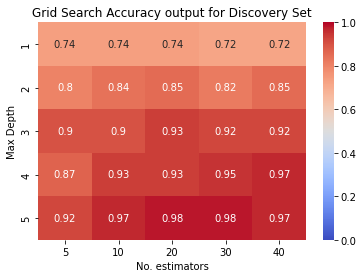

In [15]:
pivot_rfc_train = rfc_models_df.pivot('Max Depth','No. estimators','Training accuracy')
sns.heatmap(data=pivot_rfc_train, annot=True, vmin=0, vmax=1, cmap='coolwarm')
plt.title("Grid Search Accuracy output for Discovery Set")
plt.show()

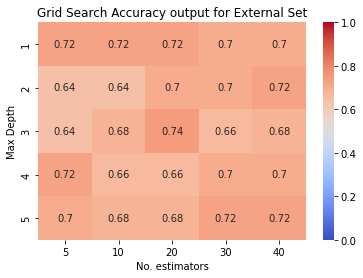

In [16]:
pivot_rfc_test = rfc_models_df.pivot('Max Depth','No. estimators','Test accuracy')
sns.heatmap(data=pivot_rfc_test, annot=True, vmin=0, vmax=1, cmap='coolwarm')
plt.title("Grid Search Accuracy output for External Set")
plt.show()

In [17]:
best_rfc_models = rfc_models_df.sort_values(by='Test AUC', ascending=False).head()
best_rfc_models

,Model Number,Model Hyperparams,Max Depth,No. estimators,Test accuracy,Training accuracy,Test AUC
12,rfc_3_20,"(DecisionTreeClassifier(max_depth=3, max_featu...",3,20,0.744681,0.934426,0.655405
9,rfc_2_40,"(DecisionTreeClassifier(max_depth=2, max_featu...",2,40,0.723404,0.852459,0.641892
23,rfc_5_30,"(DecisionTreeClassifier(max_depth=5, max_featu...",5,30,0.723404,0.983607,0.641892
24,rfc_5_40,"(DecisionTreeClassifier(max_depth=5, max_featu...",5,40,0.723404,0.967213,0.641892
19,rfc_4_40,"(DecisionTreeClassifier(max_depth=4, max_featu...",4,40,0.702128,0.967213,0.628378
